In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from word2number import w2n

In [2]:
df=pd.read_csv('hiring.csv')
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [3]:
df.rename(columns={'test_score(out of 10)':'test_score','interview_score(out of 10)':'interview_score'},inplace=True)
df.head(5)

,experience,test_score,interview_score,salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [4]:
df.isnull().sum()

experience         2
test_score         1
interview_score    0
salary($)          0
dtype: int64

In [5]:
df['experience']=df['experience'].fillna('zero')
df.head(5)

,experience,test_score,interview_score,salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [6]:
df['experience']=df['experience'].apply(w2n.word_to_num)

In [7]:
df['test_score']=df['test_score'].fillna(df['test_score'].median())
df.head(9)

,experience,test_score,interview_score,salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


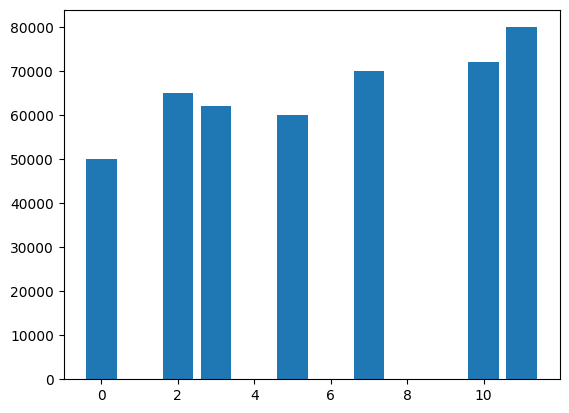

In [26]:
plt.bar((df['experience']),df['salary($)'])
plt.show()

In [11]:
X= df.drop(columns=['salary($)'])
X


,experience,test_score,interview_score
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,8.0,7
7,11,7.0,8


In [12]:
y=df['salary($)']
y.head()

0    50000
1    45000
2    60000
3    65000
4    70000
Name: salary($), dtype: int64

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

reg=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [17]:
reg.fit(X_train,y_train)

LinearRegression()

In [18]:
reg.score(X_train,y_train)

0.993584497622123

In [32]:
X_test.size

6

In [27]:
reg.predict([[7,9,6]])

c:\python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([62245.76271186])

In [28]:
reg.coef_

array([2692.09039548, -581.92090395, 2245.76271186])

In [29]:
reg.intercept_

35163.84180790961

In [30]:
reg.predict([[12,10,10]])

c:\python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([84107.34463277])

In [31]:
reg.predict(X_test)

array([57186.44067797, 62245.76271186])